In [11]:
from tqdm.auto import tqdm
import numpy as np

flatten = lambda l: [item for sublist in l for item in sublist]

def read_mgb(split_file, start_index=1, max_lines=float('inf'), max_words=float('inf')):
    r_text = []
    r_labels = []
    with open(split_file, "r") as f:
        for i, line in tqdm(enumerate(f)):
            if i >= max_lines:
                break
            tokens = [t.lower() for t in line.split()[start_index:]]
            if len(tokens) > max_words:
                max_lines += 1
                continue
            text = [t for t in tokens if "<" not in t]
            labels = ["<none>"] * len(text)
            i_off = 0
            for i, token in enumerate(tokens):
                if "<" in token:
                    labels[i - 1 - i_off] = token
                    i_off += 1
            r_text.append(text)
            r_labels.append(labels)

    return r_text, r_labels

In [5]:
train_texts, train_labels = read_mgb('train.txt')
test_texts, test_labels = read_mgb('dev.txt')
lm_texts, lm_labels = read_mgb('lm.txt', start_index=0, max_lines=1_000_000, max_words=256)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
train_lens = [len(line) for line in train_texts]
test_lens = [len(line) for line in test_texts]
lm_lens = [len(line) for line in lm_texts]

In [75]:
from opensubtitles_dataloader import OpenSubtitlesDataset
import re
legal = re.compile("^[\w,.'!?\s]*$")
opensubtites_dataset = OpenSubtitlesDataset('en', 1, first_n_lines=5_000_000, overwrite=True)
os_texts = [sent for sent in opensubtites_dataset]

In [76]:
len(os_texts), len(set(os_texts))

(5000000, 1505666)

In [77]:
os_texts = set(os_texts)

In [80]:
os_texts_new = set()
for txt in tqdm(os_texts, total=len(os_texts)):
    if legal.match(txt):
        os_texts_new.add(txt)

In [88]:
os_lens = [len(line.split()) for line in os_texts_new]

/home/cdminix/anaconda3/envs/apaut/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

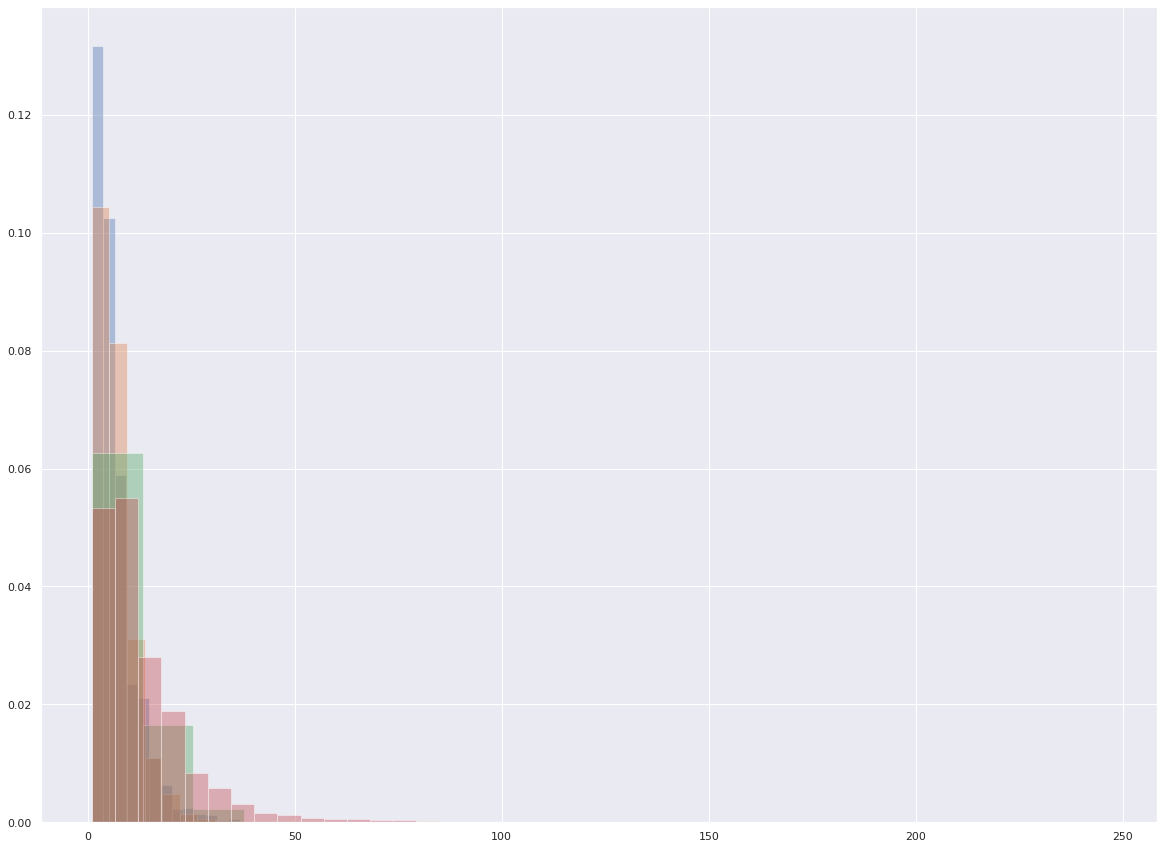

In [89]:
plt.figure(figsize=(20,15))
#
sns.distplot(test_lens, bins=20, kde = False, norm_hist=True)
sns.distplot(os_lens, bins=20, kde = False, norm_hist=True)
sns.distplot(lm_lens, bins=20, kde = False, norm_hist=True)
sns.distplot(train_lens, bins=20, kde = False, norm_hist=True)

In [81]:
len(os_texts_new)

1158340

In [82]:
len([txt for txt in os_texts_new if ('?' not in txt and '.' not in txt and '!' not in txt and ',' not in txt)])/len(os_texts_new)

0.037831724709498075

In [83]:
len([l for l in test_labels if ('<none>' in l and len(set(l)) == 1)])/len(test_labels)

0.1306919461999676

In [84]:
len([l for l in train_labels if ('<none>' in l and len(set(l)) == 1)])/len(train_labels)

0.028780968815481325

In [85]:
len([l for l in lm_labels if ('<none>' in l and len(set(l)) == 1)])/len(lm_labels)

0.000107

In [87]:
list(os_texts_new)[:100]

['how many guys is gonna be around?',
 "Oh, that's brilliant, bumpkin.",
 'I know all you said is true.',
 'Gonna get out on the road tonight',
 'The car of my dreams!',
 'With Allison, severe shock.',
 'Not like that.',
 'Then the doctor told me that both my eyes were lazy.',
 "Isn't there some sort of a reversing spell?",
 "Didn't you want me to come home?",
 'Left a lot of nice stuff.',
 "I'd better get back to the flat.",
 "What I couldn't see was where all that came to an end.",
 "But it's changed my life.",
 "And I'm a better woman for loving you.",
 'For a long time, me and Jordan, we focused, keep strong, Radcliff Enterprises.',
 'Luckily, I can furnish an alibi to your whereabouts that evening.',
 'Do you know how easy it is for dead people to travel?',
 'Clear off that table.',
 'Pantucci !',
 "Of course, maybe it's time for her to spread her wings and fly.",
 'Although my thoughts and feelings are a mess...',
 'Automobiles use routes 7, 23, 24.',
 'He has succeeded at what h

In [90]:
opensubtites_dataset = OpenSubtitlesDataset('en', 1, overwrite=True)

In [91]:
hashes = set()
with open('os_clean_1s.txt', 'w') as file:
    for sent in tqdm(opensubtites_dataset, total=len(opensubtites_dataset)):
        if legal.match(sent):
            if hash(sent) not in hashes:
                hashes.add(sent)
                file.write(sent + '\n')

In [92]:
del hashes

In [103]:
hashes = set()
with open('os_clean_1s_nodup.txt', 'w') as file:
    for line in tqdm(open('os_clean_1s.txt', 'r')):
        if hash(line) not in hashes:
            hashes.add(hash(line))
            file.write(line)

In [104]:
for line in tqdm(open('os_clean_1s_nodup.txt', 'r')):
    pass

In [105]:
441450449, 351_394_949, 80_181_378

(441450449, 351394949, 80181378)

In [106]:
for line in tqdm(open('lm.txt', 'r')):
    pass

In [107]:
hashes = set()
with open('lm_nodup.txt', 'w') as file:
    for line in tqdm(open('lm.txt', 'r')):
        if hash(line) not in hashes:
            hashes.add(hash(line))
            file.write(line)

In [108]:
for line in tqdm(open('lm_nodup.txt', 'r')):
    pass

In [99]:
89_978_100

89978100

In [115]:
!head os_clean_1s_nodup.txt

Presented by IM Pictures
Produced by Shin Cine
In association with MVP Venture Capital and Cinema Service
My Sassy Girl
Exactly two years ago today, she and I buried a time capsule here.
We promised to meet here two years later, but she hasn't come yet.
I'm going to wait.
Here we go.
Please, don't move.
One, two...


In [13]:
!head lm.txt

THE SEA ISN'T AS GREY AND MURKY AS IT LOOKS <FULL_STOP>
THE ONLY WAY TO SEE IT IS TO LEARN TO DIVE <FULL_STOP>
DIVING IN ENGLAND CAN BE JUST AS INTERESTING AS IN AUSTRALIA <FULL_STOP>
IT'S NOT AS WARM <COMMA> THOUGH <EXCLAMATION_MARK>
NEAR WEYMOUTH IS THE PURBECK MARINE RESERVE <FULL_STOP>
IT HAS AN UNDERWATER NATURE TRAIL <FULL_STOP>
SARAH <COMMA> THE WARDEN <COMMA> SHOWED ME AROUND <FULL_STOP>
JUST LIKE NATURE TRAILS ON LAND <COMMA> THERE'S A VISITORS' BOOK TO SIGN <FULL_STOP>
YOU SWIM ALONG A MARKED TRAIL <FULL_STOP>
THERE ARE LOTS OF TYPES OF SEAWEED ALONG THE TRAIL <FULL_STOP>


In [8]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = English().Defaults.create_tokenizer(nlp)

In [41]:
new_rules = {}
for key, value in tokenizer.rules.items():
    if 'who' in key.lower():
        print(key, value)
    if "'" not in key and '’' not in key:
        new_rules[key] = value

Whod [{65: 'Who', 73: 'who', 67: 'who'}, {65: 'd', 67: "'d"}]
Whodve [{65: 'Who', 73: 'who', 67: 'who'}, {65: 'd', 73: 'would', 67: 'would', 75: 'MD'}, {65: 've', 73: 'have', 67: 'have', 75: 'VB'}]
Wholl [{65: 'Who', 73: 'who', 67: 'who'}, {65: 'll', 73: 'will', 67: 'will', 75: 'MD'}]
Whollve [{65: 'Who', 73: 'who', 67: 'who'}, {65: 'll', 73: 'will', 67: 'will', 75: 'MD'}, {65: 've', 73: 'have', 67: 'have', 75: 'VB'}]
Whos [{65: 'Who', 73: 'who', 67: 'who'}, {65: 's'}]
Whove [{65: 'Who', 73: 'who'}, {65: 've', 73: 'have', 67: 'have', 75: 'VB'}]
whod [{65: 'who', 73: 'who', 67: 'who'}, {65: 'd', 67: "'d"}]
whodve [{65: 'who', 73: 'who', 67: 'who'}, {65: 'd', 73: 'would', 67: 'would', 75: 'MD'}, {65: 've', 73: 'have', 67: 'have', 75: 'VB'}]
wholl [{65: 'who', 73: 'who', 67: 'who'}, {65: 'll', 73: 'will', 67: 'will', 75: 'MD'}]
whollve [{65: 'who', 73: 'who', 67: 'who'}, {65: 'll', 73: 'will', 67: 'will', 75: 'MD'}, {65: 've', 73: 'have', 67: 'have', 75: 'VB'}]
whos [{65: 'who', 73: 'who'

In [37]:
tokenizer.rules = new_rules

In [38]:
for t in tokenizer("Please don't move"):
    print(t)

Please
don't
move


In [47]:
token_map = {
    ',': '<COMMA>',
    '.': '<FULL_STOP>',
    '...': '<DOTS>',
    '!': '<EXCLAMATION_MARK>',
    '?': '<QUESTION_MARK>'
}

def convert_token(x):
    if x.text in [',', '.', '...', '?', '!']:
        return token_map[x.text]
    return x.text.upper()

with open('os.txt', 'w') as file:
    for line in tqdm(open('os_clean_1s_nodup.txt', 'r'), total=80181378):
        file.write(' '.join([convert_token(x) for x in tokenizer(line)]).replace(" 'S", "'S"))

In [49]:
!tail os.txt

COME ON MAN <COMMA> JUST LEAVE HER ALONE <EXCLAMATION_MARK> 
HIT HIM <COMMA> HIT HIM AGAIN <COMMA> HEATHER <EXCLAMATION_MARK> 
RUN HEATHER <COMMA> GET OUTTA HERE <EXCLAMATION_MARK> 
GRAB SOMETHING HEATHER <FULL_STOP> 
GET THE HAMMER <COMMA> HIT HIM <EXCLAMATION_MARK> 
HELP ME <COMMA> PLEASE <COMMA> PLEASE <COMMA> PLEASE HELP <EXCLAMATION_MARK> 
THE COMMUTER SHIP IS HERE <FULL_STOP> 
CONTACT CORA AT ONCE <COMMA> TELL HER TO PREPARE TO DEPART <FULL_STOP> 
SIGNAL GREEN ALERT IMMEDIATELY <FULL_STOP> 
OH <COMMA> I'VE NEVER BEEN SO GLAD TO SEE ANYBODY IN MY LIFE <FULL_STOP> 
